In [7]:
#!pip install compressai
#!git clone https://github.com/InterDigitalInc/CompressAI compressai

"with torch.no_grad():\n    out_net = net_codec.forward(env.dataset_torch / 255.)\n    #out_net = net.forward(x)\nout_net['x_hat'].clamp_(0, 1)\nprint(out_net.keys())"

In [1]:
import os 
print("BRISQ")
os.system("python exec_folder/BRISQ.py")
print("Linearity")
os.system("python exec_folder/Linearity.py")
print("VSFA")
os.system("python exec_folder/VSFA.py")

BRISQ
Linearity
VSFA


1

In [2]:
import torch.nn as nn
from torchvision.transforms.functional import resize, to_tensor, normalize
class Linearity3(nn.Module):
    def __init__(self, model_dir = "E:/VMAF_METRIX/NeuralNetworkCompression/LinearityIQA/LinearityIQA/", device = device):
        super().__init__()
        sys.path.insert(1, model_dir)
        from IQAmodel import IQAModel
        self.model = IQAModel().to(device)
        checkpoint = torch.load(model_dir +"../p1q2.pth")
        self.k = checkpoint['k']
        self.b = checkpoint['b']
        self.model.load_state_dict(checkpoint['model'])
        self.model = self.model.to(device)
        del checkpoint
        
    def forward(self, im, device = device):
        im = normalize(im, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        y = self.model(im)
        val = (y[-1]* self.k[-1] + self.b[-1])
        return val 

In [ ]:
Linearity_met(X_sample[0])

In [3]:
qa = Linearity3()(X_sample)

In [5]:
qa.mean()

tensor(57.3728, device='cuda:0', grad_fn=<MeanBackward0>)

In [4]:
qa

tensor([[ 22.6079],
        [ 20.1006],
        [ 74.1178],
        [ 15.0866],
        [ 54.6991],
        [112.1416],
        [139.2781],
        [ 20.9506]], device='cuda:0', grad_fn=<AddBackward0>)

In [11]:
X_sample.shape

torch.Size([8, 3, 256, 256])

In [14]:
X_sample[0].unsqueeze(0).shape

torch.Size([1, 3, 256, 256])

In [6]:
with torch.no_grad():
    zx = Linearity()(X_sample[0].unsqueeze(0))
zx

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 1024])

In [3]:
import torch
from IQAmodel import IQAModel
import os
import numpy as np
import random
from argparse import ArgumentParser
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms.functional import resize, to_tensor, normalize
from PIL import Image
import h5py

def Linearity_met(im):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = IQAModel().to(device)  #
    im = normalize(im, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 

    checkpoint = torch.load("E:/VMAF_METRIX/NeuralNetworkCompression/LinearityIQA/LinearityIQA/../p1q2.pth")
    model.load_state_dict(checkpoint['model'])
    model.eval()
    
    y = model(im.unsqueeze(0))
    k = checkpoint['k']
    b = checkpoint['b']
    print('The image quality score is {}'.format(y[-1].item() * k[-1] + b[-1]))

<string>:505: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
<string>:505: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
<string>:505: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique lab

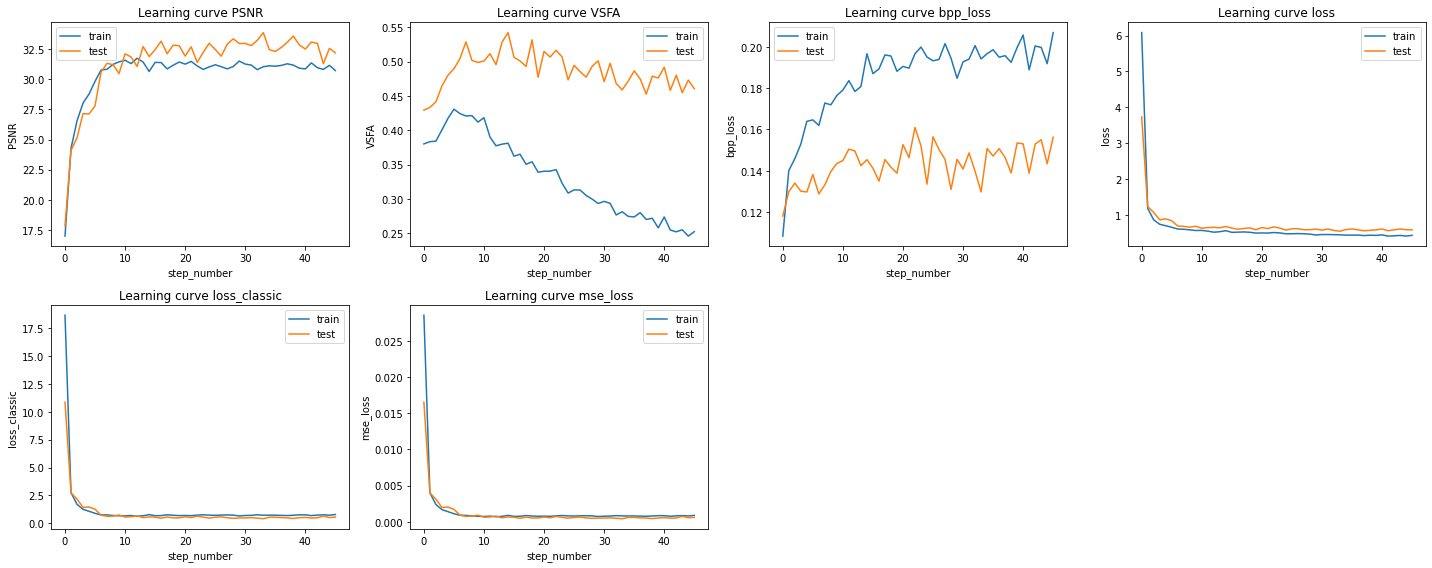

<Figure size 432x288 with 0 Axes>

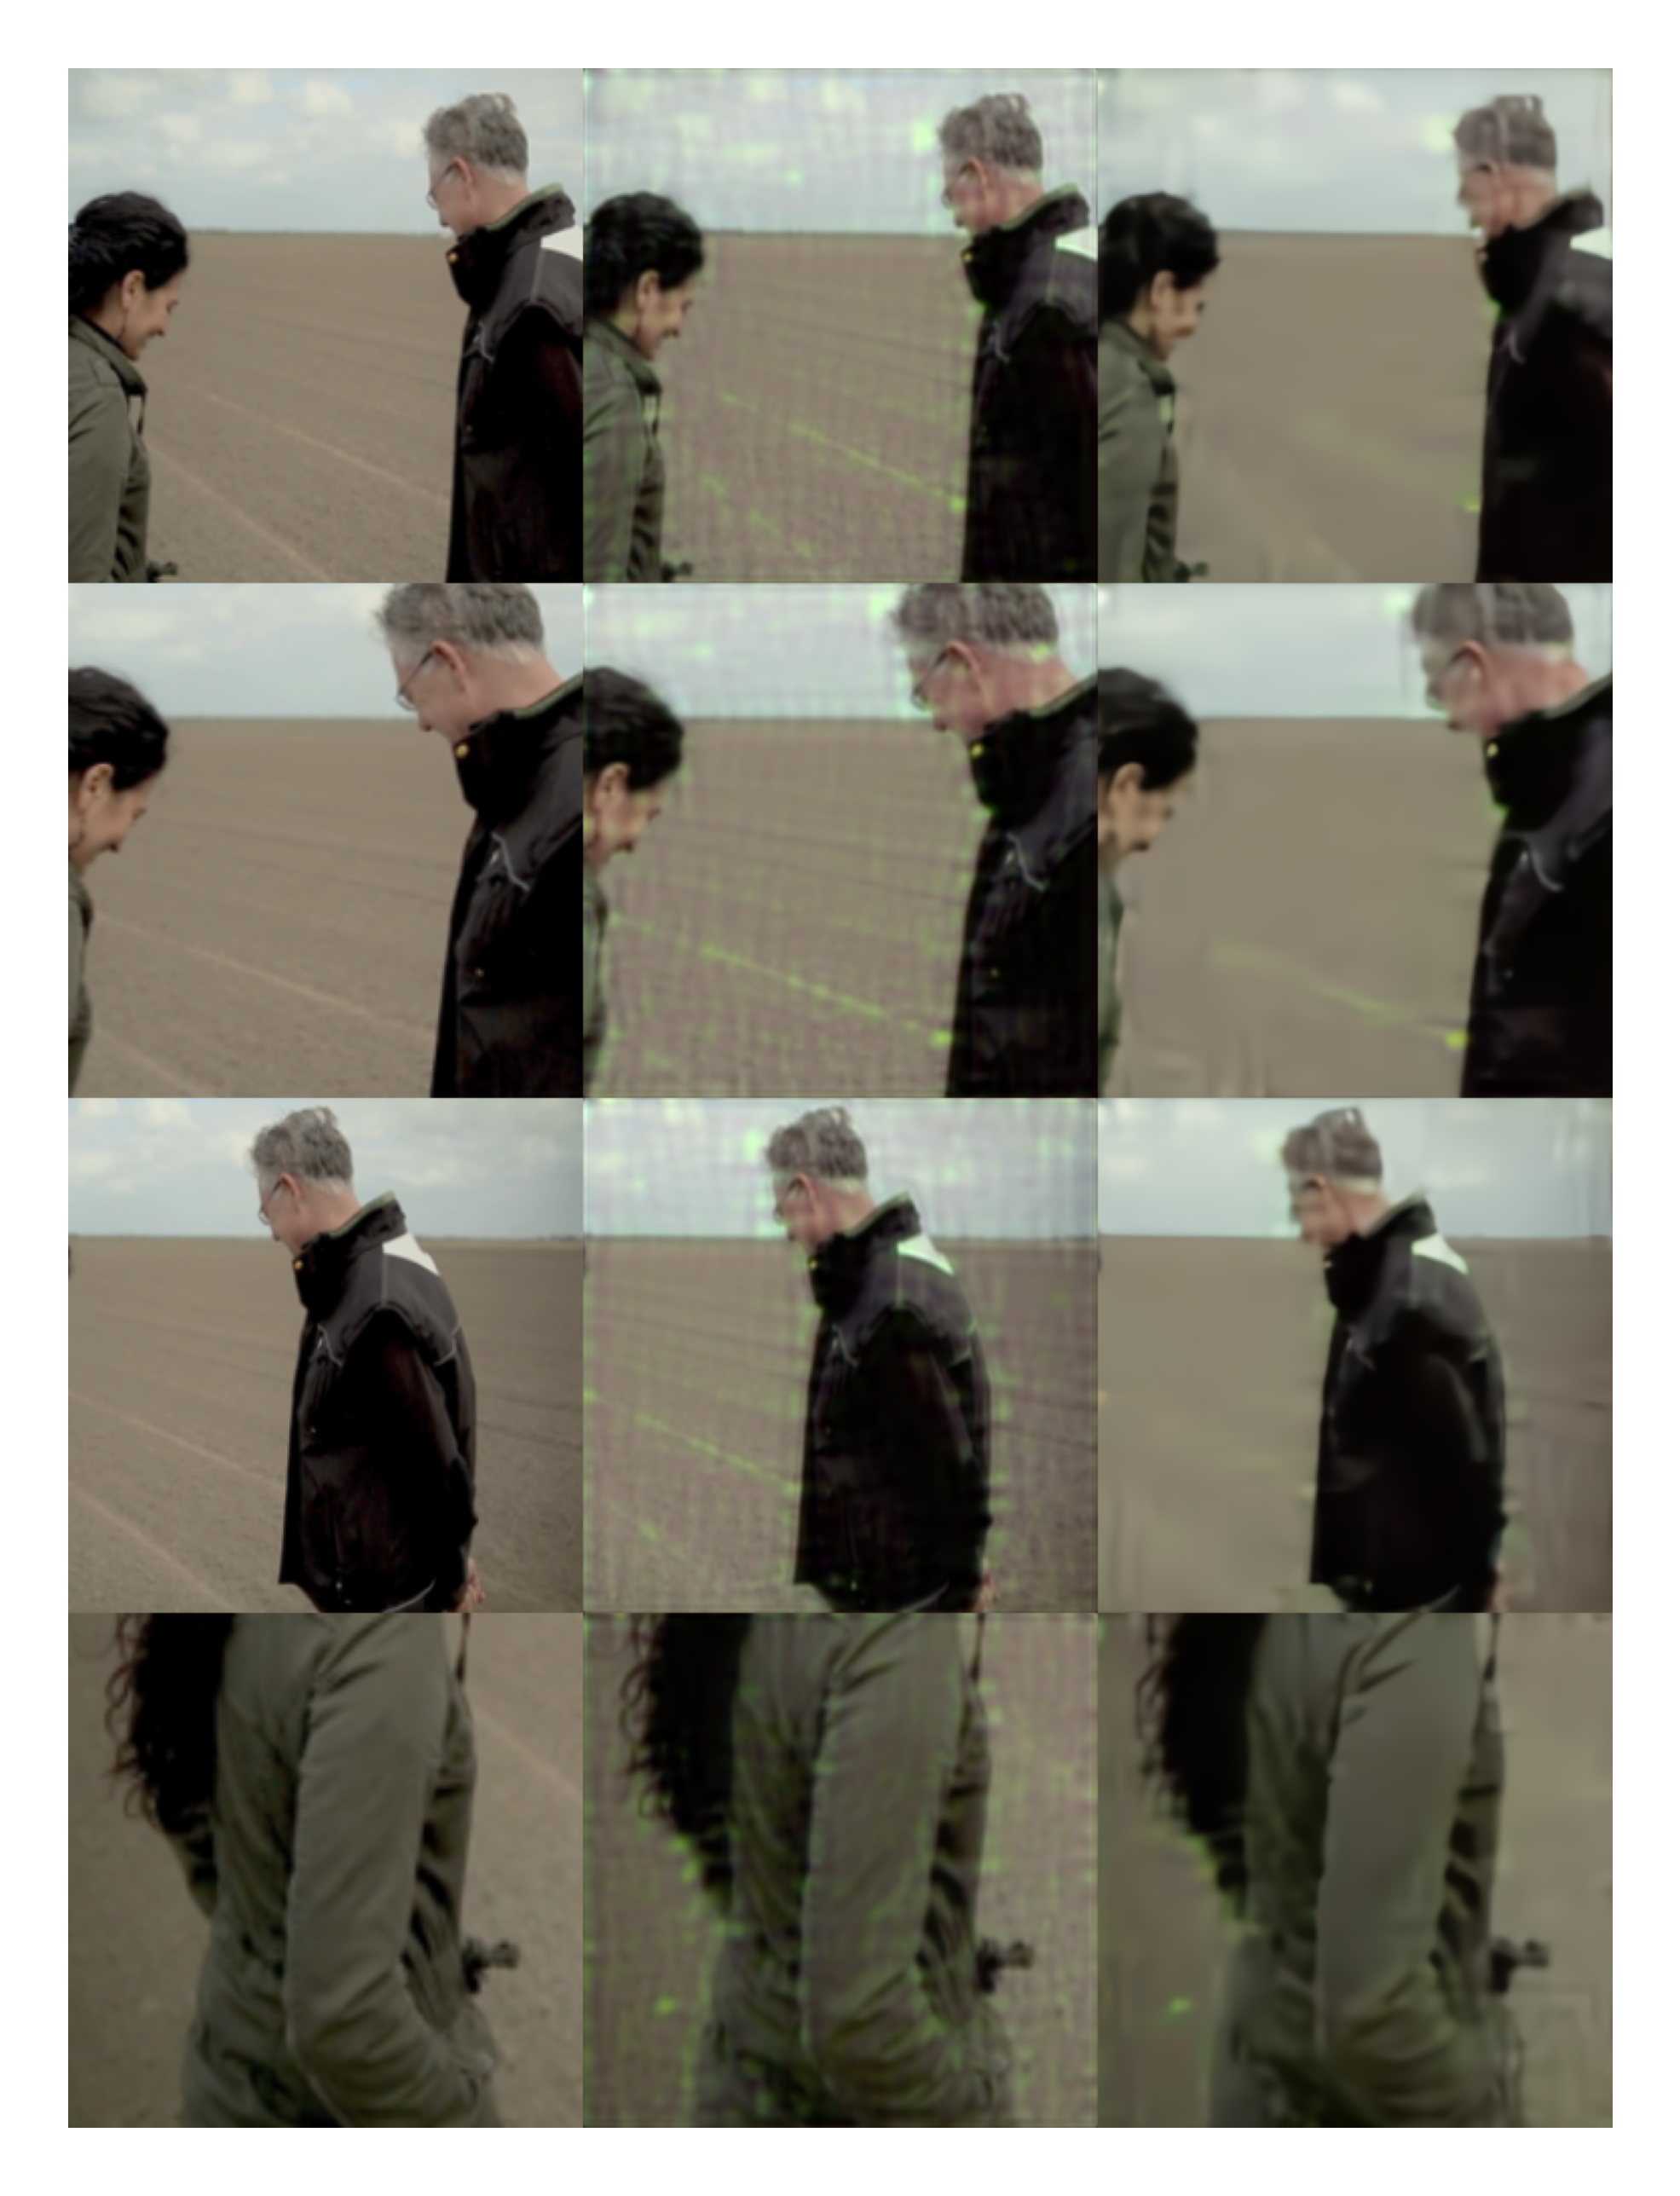

  0%|          | 0/32 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [1]:
import torchvision
import torch

class enhance_Identity():
    def __init__(self):
        pass
    def named_parameters(self):
        return {("3.quantiles",torch.nn.Parameter(torch.tensor([[0.]]))) : torch.nn.Parameter(torch.tensor([[0.]]))} 
    def parameters(self):
        return self.named_parameters() 
    def forward(self, X):
        return X
    def __call__(self, X):
        return self.forward(X)
    def to(self, device):
        return self

class codec_Identity():
    def __init__(self):
        import pickle
        self.X_hat = None
        with open('./sample_data/likelihoods.pkl', 'rb') as f:
            self.X_hat = pickle.load(f)
        self.X_out = {"likelihoods": self.X_hat}
        class entropy_bottleneck:
            def __init__(self):
                self.loss = lambda : 0
        self.entropy_bottleneck = entropy_bottleneck()
        self.entropy_bottleneck.loss = lambda : 0
    def named_parameters(self):
        return {("3.quantiles",torch.nn.Parameter(torch.tensor([[0.]]))) : torch.nn.Parameter(torch.tensor([[0.]]))}
    def forward(self, X):
        self.X_out['x_hat'] = X
        return self.X_out
    def __call__(self, X):
        return self.forward(X)
    def to(self, device):
        return self

datalen_train = 128
datalen_test = 32

optimize_image = False
net_enhance = enhance_Identity() if optimize_image else None
net_codec = codec_Identity() if optimize_image else None
save_netcodec = False
save_net_enhance = False
exec(open('Current_model.py').read())


<string>:507: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
<string>:507: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
<string>:507: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique lab

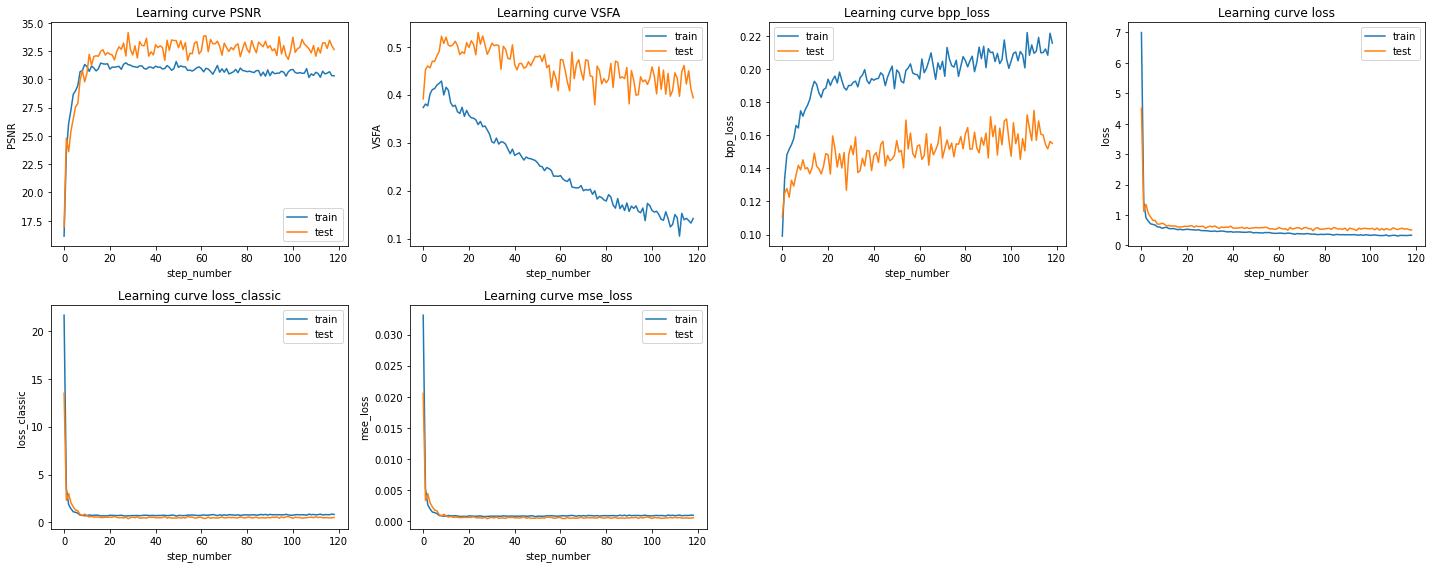

<Figure size 432x288 with 0 Axes>

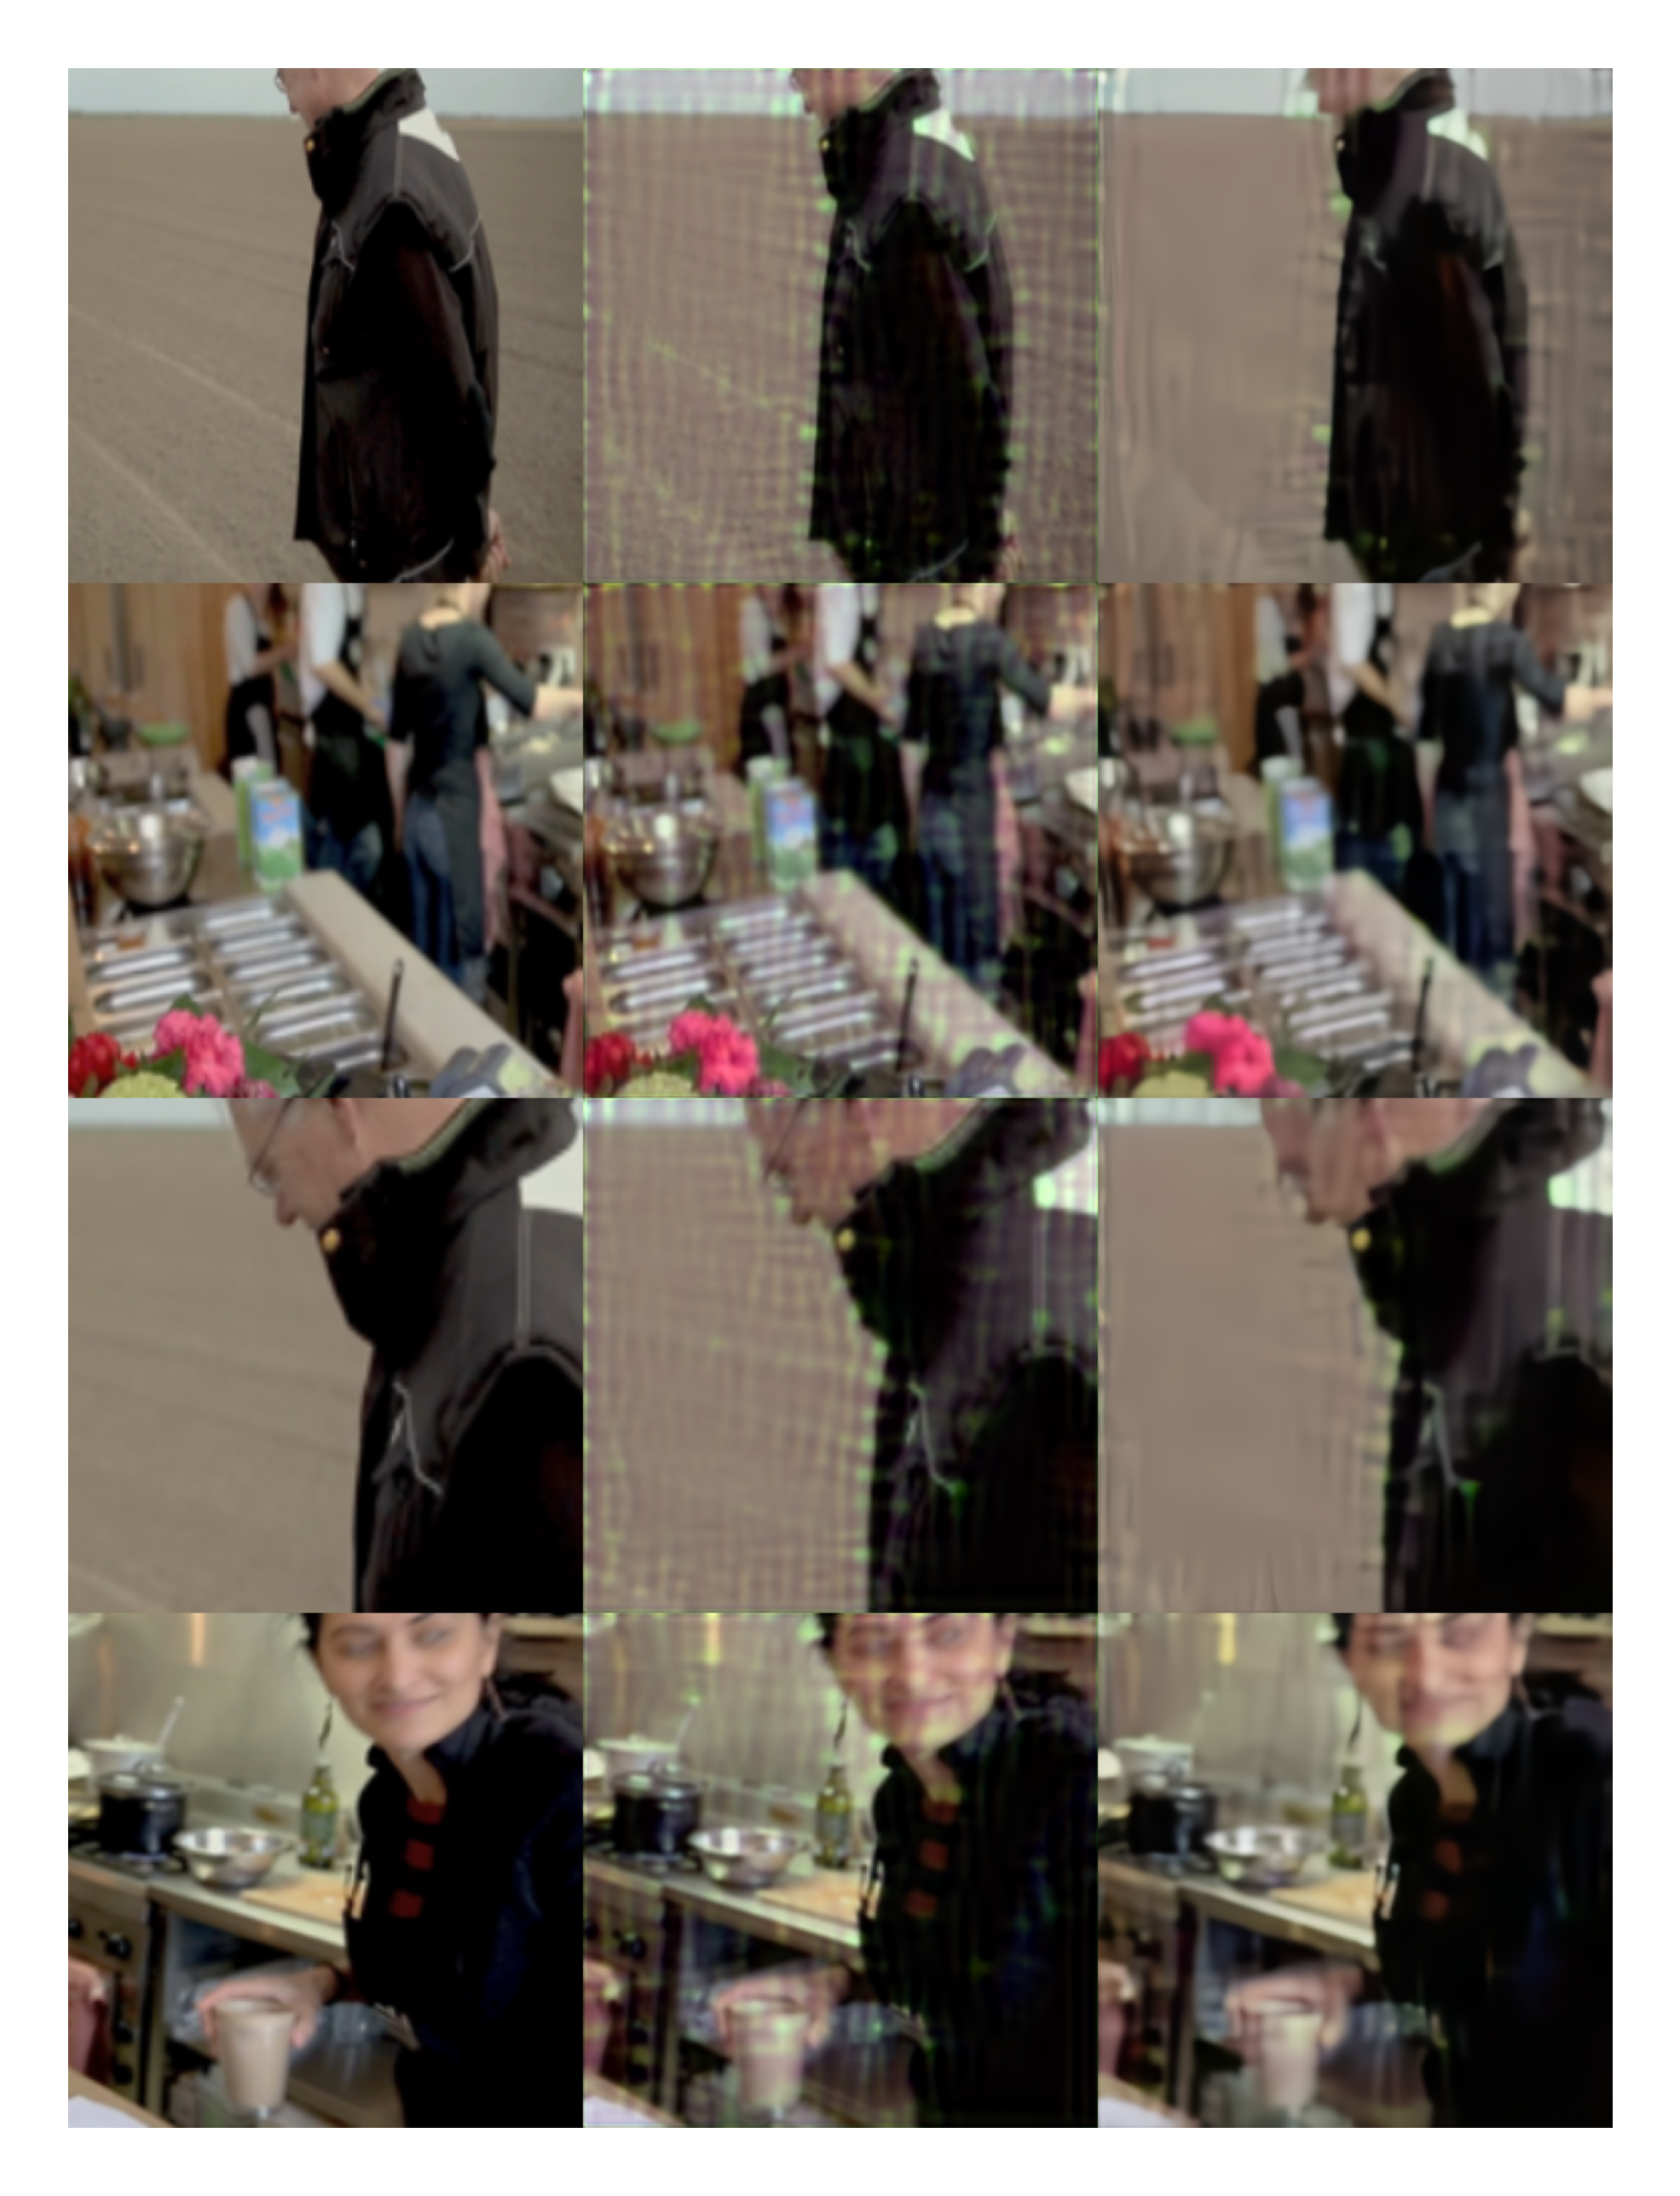

In [1]:
import torchvision
import torch

class enhance_Identity():
    def __init__(self):
        pass
    def named_parameters(self):
        return {("3.quantiles",torch.nn.Parameter(torch.tensor([[0.]]))) : torch.nn.Parameter(torch.tensor([[0.]]))} 
    def parameters(self):
        return self.named_parameters() 
    def forward(self, X):
        return X
    def __call__(self, X):
        return self.forward(X)
    def to(self, device):
        return self

class codec_Identity():
    def __init__(self):
        import pickle
        self.X_hat = None
        with open('./sample_data/likelihoods.pkl', 'rb') as f:
            self.X_hat = pickle.load(f)
        self.X_out = {"likelihoods": self.X_hat}
        class entropy_bottleneck:
            def __init__(self):
                self.loss = lambda : 0
        self.entropy_bottleneck = entropy_bottleneck()
        self.entropy_bottleneck.loss = lambda : 0
    def named_parameters(self):
        return {("3.quantiles",torch.nn.Parameter(torch.tensor([[0.]]))) : torch.nn.Parameter(torch.tensor([[0.]]))}
    def forward(self, X):
        self.X_out['x_hat'] = X
        return self.X_out
    def __call__(self, X):
        return self.forward(X)
    def to(self, device):
        return self

datalen_train = 128
datalen_test = 32

optimize_image = False
net_enhance = enhance_Identity() if optimize_image else None
net_codec = codec_Identity() if optimize_image else None
save_netcodec = False
save_net_enhance = False
exec(open('Current_model.py').read())


In [6]:

#Y = X_sample.detach().to(device)
#Y = Y.detach().to(device)
#X = Y.detach().to(device)
#X = X.detach().to(device)
X.requires_grad_()
X.retain_grad()

parameters = set(p for n, p in net_enhance.named_parameters()) if not optimize_image else [X]
optimizer = optim.Adam(parameters, lr=1e-4)

for i in range(300):
    optimizer.zero_grad()
    ls_1 = loss_calc(net_codec(net_enhance(X)), Y)
    ls_1['loss'].backward()
    max_val = X.grad.abs().max().detach().item()
    #if max_val < 1e-15:
        #max_val = 1e-15
    #X.grad.data = X.grad.data/max_val
    #X.data -= X.grad.data
    optimizer.step()
    print(max_val,ls_1['loss'].item())
    torch.nn.utils.clip_grad_norm_([X], 1)

0.00134567404165864 0.5634096264839172
0.012810442596673965 0.5771064758300781
0.002160444390028715 0.5713680386543274
0.002705539343878627 0.5711206197738647
0.002511390019208193 0.5703254342079163
0.0022175314370542765 0.5691176056861877
0.0021982411853969097 0.5675917863845825
0.0014045295538380742 0.5664074420928955
0.0013667191378772259 0.5662854909896851
0.002924239030107856 0.5665088295936584
0.002103551058098674 0.5662119388580322
0.0009429173078387976 0.5657191276550293
0.0019470015540719032 0.5654736757278442
0.0015417058020830154 0.5650888085365295
0.0011350340209901333 0.5646092891693115
0.0023033195175230503 0.5642522573471069
0.0018539809389039874 0.5641149878501892
0.0019333009840920568 0.5638412237167358
0.00267933402210474 0.5636144280433655
0.0011295637814328074 0.5633488297462463
0.0012666296679526567 0.5632190704345703
0.001611467101611197 0.5629786252975464
0.0011909420136362314 0.5627925395965576
0.0012726840795949101 0.5626764297485352
0.0008610832155682147 0.562

KeyboardInterrupt: 

In [7]:
X = Y.detach().to(device)
X.requires_grad_();

In [27]:

def load_models(paths):
    import os
    model_list = []
    for path in paths:
        if os.path.getsize(path) // 10**6 == 73:
            model_list.append(ResNetUNet(3))
        if os.path.getsize(path) // 10**6 == 10:
            model_list.append(get_simple_cnn())
        model_list[-1].load_state_dict(torch.load(path)) 
    return model_list

def MDTVSFA_psnr_bpp_loss(X_out, Y):
    loss = rdLoss(X_out, Y)
    #loss['MDTVSFA'] = -metr.MDTVSFA(X_out['x_hat'])
    #loss["LPIPS"] = lpips(X_out['x_hat'], X)
    #loss["DISTS"] = dists(X_out['x_hat'], X)
    #loss["loss"] =  loss["DISTS"] + loss["bpp_loss"] #+ loss["LPIPS"]
    loss['MDTVSFA'] = -metr.MDTVSFA(X_out['x_hat'])
    loss['PSNR'] = 10 * torch.log10(1. / loss['mse_loss'])
    return loss

def compute_model_codec_dataset(net_enhance, net_codec, dataset, loss_f = MDTVSFA_psnr_bpp_loss):
    logs_plot_cur = {}
    tqdm_dataset = tqdm(dataset)
    for frame in tqdm_dataset:
        X = frame
        X = torchvision.transforms.RandomResizedCrop((256,256))(X)
        X = X.detach().to(device)
        Y = X.detach().clone().to(device)
        X_enhance = net_enhance(X)
        X_out = net_codec.forward(X_enhance)
        loss = loss_f(X_out, Y)
        for j in list(loss.keys()):
            if not j in logs_plot_cur:
                logs_plot_cur[j] = []
            logs_plot_cur[j].append(loss[j].data.to("cpu").numpy())
        X.data.clamp_(min=0,max=1)
        X_out['x_hat'].data.clamp_(min=0,max=1)
    for j in list(logs_plot_cur.keys()):
        logs_plot_cur[j] = np.mean(logs_plot_cur[j])
    return logs_plot_cur

def append_dict(dict_from, dict_to):
    for j in list(dict_from.keys()):
        if not j in dict_to:
            dict_to[j] = []
        dict_to[j].append(np.mean(dict_from[j]))    
    return dict_to
    
def model_codecs_dataset(net_enhance, net_codecs, dataset, loss_f = MDTVSFA_psnr_bpp_loss):
    logs_plot = {}
    for net_codec in net_codecs:
        net_codec_gpu = net_codec.to(device)
        net_enhance_gpu = net_enhance.to(device)
        logs_plot_cur = compute_model_codec_dataset(net_enhance_gpu, net_codec_gpu, dataset, loss_f = MDTVSFA_psnr_bpp_loss)
        logs_plot = append_dict(logs_plot_cur, logs_plot)
        del net_codec_gpu
        del net_enhance_gpu 
    return logs_plot
    
def models_codecs_dataset(net_enhances, net_codecs, dataset, loss_f = MDTVSFA_psnr_bpp_loss):
    logs_plot = []
    for net_enhance in net_enhances:
        logs_plot_cur = model_codecs_dataset(net_enhance, net_codecs, dataset, loss_f = MDTVSFA_psnr_bpp_loss)
        logs_plot.append(logs_plot_cur)
    return logs_plot    

def compare_models(models, net_codec, dataset):
    import os
    log_all = []
    with torch.no_grad():
        logs_plot = {}
        for model in models:
            logs_plot_cur = compute_model_codec_dataset(model, net_codec, dataset)
            for j in list(logs_plot_cur.keys()):
                if not j in logs_plot:
                    logs_plot[j] = []
                logs_plot[j].append(np.mean(logs_plot_cur[j]))
            log_all.append(logs_plot)
    return log_all

In [28]:
test_RDcurves = models_codecs_dataset(load_models(["models_enhancement/model_vimeo11k_original_model.ckpt", 
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance.ckpt", 
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_no_codec.ckpt",
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_quality5.ckpt"]), [cheng2020_attn(quality=1 + i, pretrained=True).eval() for i in range(6)], dataset_test, loss_f = MDTVSFA_psnr_bpp_loss)
test_RDcurves

Downloading: "https://compressai.s3.amazonaws.com/models/v1/cheng2020_attn-mse-1-465f2b64.pth.tar" to C:\Users\MaxV/.cache\torch\hub\checkpoints\cheng2020_attn-mse-1-465f2b64.pth.tar


  0%|          | 0.00/54.3M [00:00<?, ?B/s]

Downloading: "https://compressai.s3.amazonaws.com/models/v1/cheng2020_attn-mse-4-f7b0ccf2.pth.tar" to C:\Users\MaxV/.cache\torch\hub\checkpoints\cheng2020_attn-mse-4-f7b0ccf2.pth.tar


  0%|          | 0.00/121M [00:00<?, ?B/s]

Downloading: "https://compressai.s3.amazonaws.com/models/v1/cheng2020_attn-mse-6-730501f2.pth.tar" to C:\Users\MaxV/.cache\torch\hub\checkpoints\cheng2020_attn-mse-6-730501f2.pth.tar


  0%|          | 0.00/121M [00:00<?, ?B/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

[{'bpp_loss': [0.053283706,
   0.045385327,
   0.08408048,
   0.063756734,
   0.058424782,
   0.30000064],
  'mse_loss': [0.17005473,
   0.16412972,
   0.16408768,
   0.16793457,
   0.16823757,
   0.17433123],
  'loss_classic': [110.631386,
   106.77073,
   106.78209,
   109.263214,
   109.4549,
   113.65889],
  'MDTVSFA': [-0.4534301,
   -0.45124936,
   -0.4502846,
   -0.46358562,
   -0.45815387,
   -0.45743957],
  'PSNR': [7.9112935, 8.151906, 8.120291, 8.014034, 7.975579, 7.8164124]},
 {'bpp_loss': [0.0532654,
   0.07954487,
   0.11626127,
   0.1692086,
   0.22265413,
   0.31874764],
  'mse_loss': [0.00029595752,
   0.00021577967,
   0.00016346552,
   0.00014409852,
   0.00013400514,
   0.0001366617],
  'loss_classic': [0.24571174,
   0.21985558,
   0.22255474,
   0.26290864,
   0.30979097,
   0.40761197],
  'MDTVSFA': [-0.47990865,
   -0.5226941,
   -0.53684646,
   -0.5573643,
   -0.55687255,
   -0.5630593],
  'PSNR': [35.592945, 36.929554, 38.163418, 38.55698, 38.815487, 38.74144]

In [32]:
32

32

In [29]:
test_RDcurves

[{'bpp_loss': [0.053283706,
   0.045385327,
   0.08408048,
   0.063756734,
   0.058424782,
   0.30000064],
  'mse_loss': [0.17005473,
   0.16412972,
   0.16408768,
   0.16793457,
   0.16823757,
   0.17433123],
  'loss_classic': [110.631386,
   106.77073,
   106.78209,
   109.263214,
   109.4549,
   113.65889],
  'MDTVSFA': [-0.4534301,
   -0.45124936,
   -0.4502846,
   -0.46358562,
   -0.45815387,
   -0.45743957],
  'PSNR': [7.9112935, 8.151906, 8.120291, 8.014034, 7.975579, 7.8164124]},
 {'bpp_loss': [0.0532654,
   0.07954487,
   0.11626127,
   0.1692086,
   0.22265413,
   0.31874764],
  'mse_loss': [0.00029595752,
   0.00021577967,
   0.00016346552,
   0.00014409852,
   0.00013400514,
   0.0001366617],
  'loss_classic': [0.24571174,
   0.21985558,
   0.22255474,
   0.26290864,
   0.30979097,
   0.40761197],
  'MDTVSFA': [-0.47990865,
   -0.5226941,
   -0.53684646,
   -0.5573643,
   -0.55687255,
   -0.5630593],
  'PSNR': [35.592945, 36.929554, 38.163418, 38.55698, 38.815487, 38.74144]

In [30]:
train_RDcurves = models_codecs_dataset(load_models(["models_enhancement/model_vimeo11k_original_model.ckpt", 
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance.ckpt", 
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_no_codec.ckpt",
                                   "models_enhancement/model_vimeo11k_MDTVSFA_2000mse_enhance_quality5.ckpt"]), [cheng2020_attn(quality=1 + i, pretrained=True).eval() for i in range(6)], dataset_train, loss_f = MDTVSFA_psnr_bpp_loss)
train_RDcurves

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/2750 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  0%|          | 0/2750 [00:00<?, ?it/s]

  0%|          | 0/2750 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
len(train_RDcurvesain_RDcurves)

4

In [34]:
train_RDcurves

[{'bpp_loss': [0.049163073,
   0.044195436,
   0.08203535,
   0.06397402,
   0.05905388,
   0.29974446],
  'mse_loss': [0.20917673,
   0.20771004,
   0.21047533,
   0.20914485,
   0.20744511,
   0.21679568],
  'loss_classic': [136.06633,
   135.10767,
   136.94362,
   136.06041,
   134.95023,
   141.27113],
  'MDTVSFA': [-0.45324335,
   -0.45122096,
   -0.45030344,
   -0.46338886,
   -0.45814738,
   -0.45712712],
  'PSNR': [7.1191306, 7.1576924, 7.0900683, 7.1140547, 7.170601, 6.9356804]},
 {'bpp_loss': [0.06311762,
   0.09020506,
   0.13302171,
   0.19909228,
   0.26970476,
   0.371055],
  'mse_loss': [0.0003828995,
   0.0002670833,
   0.00020315651,
   0.00017813264,
   0.00016778753,
   0.00016124349],
  'loss_classic': [0.312098,
   0.263876,
   0.26512423,
   0.31492305,
   0.3788086,
   0.4759036],
  'MDTVSFA': [-0.49183837,
   -0.5316614,
   -0.55050814,
   -0.5600437,
   -0.56349325,
   -0.56572497],
  'PSNR': [34.558243, 36.079647, 37.22513, 37.700294, 37.902596, 38.054]},
 {'

In [16]:
logs_plot

{'bpp_loss': [0.15060389, 0.15349767, 0.15426429, 0.15429342],
 'mse_loss': [0.005398823, 0.0021298656, 0.001457751, 0.0014720722],
 'loss_classic': [3.6611881, 1.5384426, 1.1021669, 1.1115084],
 'DISTS': [0.18454829, 0.15481272, 0.14992912, 0.14919277],
 'loss': [0.33515218, 0.3083104, 0.3041934, 0.30348617],
 'aux_loss': [27.23124, 27.23124, 27.23124, 27.23124],
 'bpp_loss_test': [0.14790304, 0.14526181, 0.14673911, 0.14549986],
 'mse_loss_test': [0.00096509367, 0.0021710424, 0.0006469883, 0.00060693524],
 'loss_classic_test': [0.7754552, 1.5569823, 0.56744325, 0.54015946],
 'DISTS_test': [0.13393578, 0.15077142, 0.13988358, 0.13982187],
 'loss_test': [0.2818388, 0.29603323, 0.28662267, 0.2853217],
 'aux_loss_test': [27.23124, 27.23124, 27.23124, 27.23124]}

In [35]:
def compare_model_logs(model_log_paths):
    plots_all = []
    for path in model_log_paths:
        with open(path, 'rb') as f:
            plots_all.append(pickle.load(f))
    RD_curve = []
    Data_1 = {}
    for plot in plots_all:
        for key in plot.keys():
            if not (key in Data_1):
                Data_1[key] = []
            Data_1[key].append(plot[key][-1])
    return Data_1

In [36]:
compare_model_logs(["models/plotsvimeo11k_model_vimeo9k_bpp_DISTS_enhance_cnn_simple2M.pkl", 
                    "models/plotsvimeo11k_model_vimeo9k_DISTS_enhance.pkl",
                   "models/plotsvimeo11k_model_vimeo9k_DISTS_MDTVSFA_LPIPS_enhance.pkl"])

{'bpp_loss': [0.15429342, 0.15357186, 0.17250063],
 'mse_loss': [0.0014720722, 0.0005990791, 0.0024296308],
 'loss_classic': [1.1115084, 0.54312307, 1.7523679],
 'DISTS': [0.14919277, 0.115232676, 0.14045574],
 'loss': [0.30348617, 0.26880452, -0.11911303],
 'aux_loss': [27.23124, 27.23124, 27.23124],
 'bpp_loss_test': [0.14549986, 0.14658152, 0.16310762],
 'mse_loss_test': [0.00060693524, 0.0004037853, 0.0028363967],
 'loss_classic_test': [0.54015946, 0.40914285, 2.0074742],
 'DISTS_test': [0.13982187, 0.11070264, 0.14138897],
 'loss_test': [0.2853217, 0.25728413, -0.16857834],
 'aux_loss_test': [27.23124, 27.23124, 27.23124],
 'MDTVSFA': [-0.621173],
 'LPIPS': [0.18910365],
 'MDTVSFA_test': [-0.6595494],
 'LPIPS_test': [0.18647447]}

In [ ]:
Simple_CNN DISTS 10Mb bpp_train 0.1535, DISTS_train 0.1491, bpp_loss_test 0.1454, DISTS_test 0.13982, mse_test 0.0006, mse_train 0.00147
DISTS_ResUnet    75Mb bpp_train 0.154, DISTS_train 0.11523, bpp_loss_test 0.1465, DISTS_test 0.1107, mse_test 0.0004, mse_train 0.000599

In [17]:
from useful_tools import count_parameters

In [18]:
X = frame.to(device)
X_enhance = net_enhance(X)
X_out = net_codec.forward(X)

In [70]:
#losses
from piq import GMSDLoss, PieAPP, VSILoss, FSIMLoss, HaarPSILoss
from IQA_pytorch import NLPD
v = HaarPSILoss().cpu()(X.cpu(),X.cpu())
v = FSIMLoss().cpu()(X.cpu(),X.cpu())
v = NLPD().cpu()(X.cpu(),X.cpu())
v = VSILoss().cpu()(X.cpu(),X.cpu())
v = GMSDLoss().cpu()(X.cpu(),X.cpu())
v = PieAPP(enable_grad = True).cpu()(X.cpu(),X.cpu())

In [76]:
X_enchch.shape

torch.Size([8, 3, 256, 256])

In [78]:
X.shape

torch.Size([8, 3, 256, 256])